# Data setup and Overview

In [1]:
import pandas as pd
df_train = pd.read_csv("/kaggle/input/playground-series-s4e7/train.csv")
df_test = pd.read_csv("/kaggle/input/playground-series-s4e7/test.csv")


In [2]:

df_train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,Male,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0
1,1,Male,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1
2,2,Female,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0
3,3,Female,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0
4,4,Female,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0


In [3]:
df_test.head()


,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,11504798,Female,20,1,47.0,0,< 1 Year,No,2630.0,160.0,228
1,11504799,Male,47,1,28.0,0,1-2 Year,Yes,37483.0,124.0,123
2,11504800,Male,47,1,43.0,0,1-2 Year,Yes,2630.0,26.0,271
3,11504801,Female,22,1,47.0,1,< 1 Year,No,24502.0,152.0,115
4,11504802,Male,51,1,19.0,0,1-2 Year,No,34115.0,124.0,148


# Cleaning the traing set

row dropping

In [4]:
# Drop rows where the target variable (Response) is missing
df_train.dropna(subset=['Response'], inplace=True)

column dropping (take care than the target column is not get to be drpped)

In [5]:
import pandas as pd

# Assuming df_train is your training DataFrame
# Calculate the percentage of missing values for each column
missing_percentage = df_train.isnull().mean() * 100

# Display the percentage of missing values
print("Percentage of missing values for each column:\n", missing_percentage)





Percentage of missing values for each column:
 id                      0.0
Gender                  0.0
Age                     0.0
Driving_License         0.0
Region_Code             0.0
Previously_Insured      0.0
Vehicle_Age             0.0
Vehicle_Damage          0.0
Annual_Premium          0.0
Policy_Sales_Channel    0.0
Vintage                 0.0
Response                0.0
dtype: float64


In [6]:

# Define the threshold for dropping columns
threshold = 30

# Drop columns with missing values greater than the threshold
df_train_cleaned = df_train.loc[:, missing_percentage <= threshold]
df_test_cleaned = df_test.loc[:, missing_percentage <= threshold]


# Display the cleaned DataFrame
df_train_cleaned.head()


,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,Male,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0
1,1,Male,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1
2,2,Female,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0
3,3,Female,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0
4,4,Female,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0


# Preparing datasets

In [7]:
X_train = df_train_cleaned.drop(columns=['Response'])
y_train = df_train_cleaned['Response']
X_test=df_test_cleaned


In [8]:
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')


X_train shape: (11504798, 11)
y_train shape: (11504798,)


# Imputation

In [9]:
from sklearn.impute import SimpleImputer

# Initialize SimpleImputer with strategy
numeric_imputer = SimpleImputer(strategy='mean')  # You can change strategy as needed
categorical_imputer = SimpleImputer(strategy='most_frequent')

# Assuming X_train and X_test have both numeric and categorical columns
numeric_cols = X_train.select_dtypes(include=['number']).columns
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns

# Fit and transform on X_train
X_train[numeric_cols] = numeric_imputer.fit_transform(X_train[numeric_cols])
X_train[categorical_cols] = categorical_imputer.fit_transform(X_train[categorical_cols])

# Transform X_test (only transform, no fit)
X_test[numeric_cols] = numeric_imputer.transform(X_test[numeric_cols])
X_test[categorical_cols] = categorical_imputer.transform(X_test[categorical_cols])


In [10]:
#Check for shapes
print(X_test.shape,X_train.shape,y_train.shape)

(7669866, 11) (11504798, 11) (11504798,)


# Encoding


choosing features for different encodings

In [11]:

#list of features for ordinal encoding
features_oe=['Vehicle_Age']

#list of features for one hot encoding
features_ohe=[]

#list of features for binary encoding
features_bie=['Gender','Vehicle_Damage']




In [12]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
import category_encoders as ce

# Ordinal Encoding
oe = OrdinalEncoder()
X_train[features_oe] = oe.fit_transform(X_train[features_oe])
X_test[features_oe]=oe.transform(X_test[features_oe])

# One Hot Encoding (currently empty list, so no transformation)
if features_ohe:
    ohe = OneHotEncoder(sparse=False, drop='first')
    X_train_ohe = ohe.fit_transform(X_train[features_ohe])
    X_test_ohe = ohe.transform(X_test[features_ohe])

    # Convert to DataFrame to merge back with original dataframes
    X_train_ohe = pd.DataFrame(X_train_ohe, columns=ohe.get_feature_names_out(features_ohe), index=X_train.index)
    X_test_ohe = pd.DataFrame(X_test_ohe, columns=ohe.get_feature_names_out(features_ohe), index=X_test.index)
    
    # Drop original features and concatenate the one-hot encoded features
    X_train = X_train.drop(features_ohe, axis=1).join(X_train_ohe)
    X_test = X_test.drop(features_ohe, axis=1).join(X_test_ohe)
# Binary Encoding
if features_bie:
    bie = ce.BinaryEncoder(cols=features_bie)
    X_train = bie.fit_transform(X_train)
    X_test=bie.transform(X_test)

# Display the shape of transformed dataframe
print(X_train.shape,X_test.shape,y_train.shape)



(11504798, 13) (7669866, 13) (11504798,)


In [13]:
X_test


,id,Gender_0,Gender_1,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage_0,Vehicle_Damage_1,Annual_Premium,Policy_Sales_Channel,Vintage
0,11504798.0,1,0,20.0,1.0,47.0,0.0,1.0,1,0,2630.0,160.0,228.0
1,11504799.0,0,1,47.0,1.0,28.0,0.0,0.0,0,1,37483.0,124.0,123.0
2,11504800.0,0,1,47.0,1.0,43.0,0.0,0.0,0,1,2630.0,26.0,271.0
3,11504801.0,1,0,22.0,1.0,47.0,1.0,1.0,1,0,24502.0,152.0,115.0
4,11504802.0,0,1,51.0,1.0,19.0,0.0,0.0,1,0,34115.0,124.0,148.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7669861,19174659.0,0,1,57.0,1.0,28.0,0.0,0.0,0,1,51661.0,124.0,109.0
7669862,19174660.0,0,1,28.0,1.0,50.0,1.0,1.0,1,0,25651.0,152.0,184.0
7669863,19174661.0,0,1,47.0,1.0,33.0,1.0,0.0,1,0,2630.0,138.0,63.0
7669864,19174662.0,0,1,30.0,1.0,28.0,0.0,1.0,0,1,38866.0,124.0,119.0


In [14]:
X_train

,id,Gender_0,Gender_1,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage_0,Vehicle_Damage_1,Annual_Premium,Policy_Sales_Channel,Vintage
0,0.0,0,1,21.0,1.0,35.0,0.0,0.0,0,1,65101.0,124.0,187.0
1,1.0,0,1,43.0,1.0,28.0,0.0,2.0,0,1,58911.0,26.0,288.0
2,2.0,1,0,25.0,1.0,14.0,1.0,1.0,1,0,38043.0,152.0,254.0
3,3.0,1,0,35.0,1.0,1.0,0.0,0.0,0,1,2630.0,156.0,76.0
4,4.0,1,0,36.0,1.0,15.0,1.0,0.0,1,0,31951.0,152.0,294.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11504793,11504793.0,0,1,48.0,1.0,6.0,0.0,0.0,0,1,27412.0,26.0,218.0
11504794,11504794.0,1,0,26.0,1.0,36.0,0.0,1.0,0,1,29509.0,152.0,115.0
11504795,11504795.0,1,0,29.0,1.0,32.0,1.0,1.0,1,0,2630.0,152.0,189.0
11504796,11504796.0,1,0,51.0,1.0,28.0,0.0,0.0,0,1,48443.0,26.0,274.0


# Data scaling

In [15]:

import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming X_train and X_test are already defined
# Example:
# X_train = df_train_cleaned.drop(columns=['Response'])
# X_test = df_test_cleaned.drop(columns=['Response'])

# List of columns to scale
columns_to_scale = ['Age', 'Annual_Premium', 'Vintage']  # Replace with your specific columns

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the specified columns of the training data
scaler.fit(X_train[columns_to_scale])

# Transform the specified columns in the training and test data
X_train[columns_to_scale] = scaler.transform(X_train[columns_to_scale])
X_test[columns_to_scale] = scaler.transform(X_test[columns_to_scale])

# Now, X_train and X_test contain the scaled values only for the specified columns


In [16]:
X_test

,id,Gender_0,Gender_1,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage_0,Vehicle_Damage_1,Annual_Premium,Policy_Sales_Channel,Vintage
0,11504798.0,1,0,-1.226106,1.0,47.0,0.0,1.0,1,0,-1.691389,160.0,0.801483
1,11504799.0,0,1,0.574680,1.0,28.0,0.0,0.0,0,1,0.426724,124.0,-0.511353
2,11504800.0,0,1,0.574680,1.0,43.0,0.0,0.0,0,1,-1.691389,26.0,1.339121
3,11504801.0,1,0,-1.092714,1.0,47.0,1.0,1.0,1,0,-0.362167,152.0,-0.611378
4,11504802.0,0,1,0.841463,1.0,19.0,0.0,0.0,1,0,0.222041,124.0,-0.198773
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7669861,19174659.0,0,1,1.241637,1.0,28.0,0.0,0.0,0,1,1.288360,124.0,-0.686397
7669862,19174660.0,0,1,-0.692540,1.0,50.0,1.0,1.0,1,0,-0.292339,152.0,0.251343
7669863,19174661.0,0,1,0.574680,1.0,33.0,1.0,0.0,1,0,-1.691389,138.0,-1.261545
7669864,19174662.0,0,1,-0.559148,1.0,28.0,0.0,1.0,0,1,0.510772,124.0,-0.561365


# Dataset balancing

In [17]:
import pandas as pd
from imblearn.under_sampling import RandomUnderSampler

# Assume X_train and y_train are your training features and target variable respectively
# Initialize the undersampler
undersampler = RandomUnderSampler(random_state=42)

# Perform undersampling
X_train_res, y_train_res = undersampler.fit_resample(X_train, y_train)

# Display the class distribution after undersampling
print(pd.Series(y_train_res).value_counts())
X_train=X_train_res
y_train=y_train_res

print(X_train.shape,y_train.shape)


Response
0    1415059
1    1415059
Name: count, dtype: int64
(2830118, 13) (2830118,)


In [18]:
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')


X_train shape: (2830118, 13)
y_train shape: (2830118,)


# Feature Elemination

                            id  Gender_0  Gender_1       Age  Driving_License  \
id                    1.000000 -0.000104  0.000104 -0.000328        -0.000312   
Gender_0             -0.000104  1.000000 -1.000000 -0.140429         0.015209   
Gender_1              0.000104 -1.000000  1.000000  0.140429        -0.015209   
Age                  -0.000328 -0.140429  0.140429  1.000000        -0.064216   
Driving_License      -0.000312  0.015209 -0.015209 -0.064216         1.000000   
Region_Code           0.000071  0.003603 -0.003603  0.033099        -0.000486   
Previously_Insured    0.000489  0.094188 -0.094188 -0.284872         0.003271   
Vehicle_Age           0.000050  0.067502 -0.067502 -0.364223         0.015068   
Vehicle_Damage_0      0.000286  0.100745 -0.100745 -0.296381         0.003642   
Vehicle_Damage_1     -0.000286 -0.100745  0.100745  0.296381        -0.003642   
Annual_Premium       -0.000015 -0.014299  0.014299  0.097239        -0.006524   
Policy_Sales_Channel  0.0009

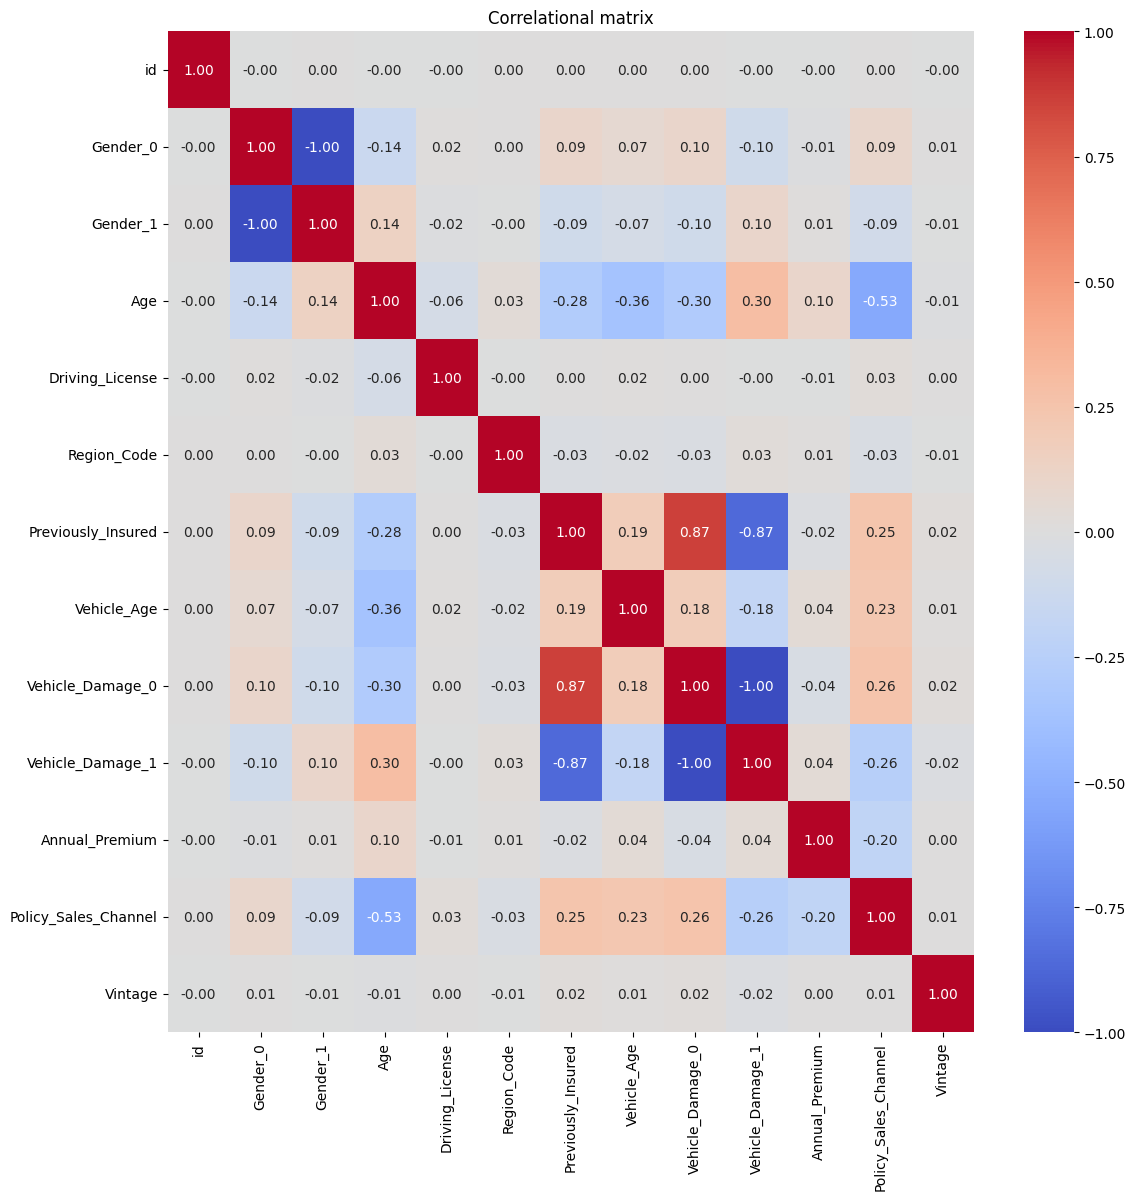

In [19]:
import seaborn as sns

correlation_matrix=X_train.corr()

print(correlation_matrix)

import matplotlib.pyplot as plt

plt.figure(figsize=(13,13))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Correlational matrix')
plt.show()


In [20]:
import numpy as np

# Create a mask to identify highly correlated features
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Identify the features with a correlation coefficient greater than a specified threshold (e.g., 0.9)
threshold = 0.9
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column].abs() > threshold)]

# Drop the highly correlated features
X_train = X_train.drop(columns=to_drop)
X_test = X_test.drop(columns=to_drop)


# Print the remaining features
print("Remaining features after dropping highly correlated ones:")
print(X_train.columns)


Remaining features after dropping highly correlated ones:
Index(['id', 'Gender_0', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage_0',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage'],
      dtype='object')


In [21]:
len(to_drop)

2

In [22]:
X_train

,id,Gender_0,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage_0,Annual_Premium,Policy_Sales_Channel,Vintage
9312666,9312666.0,0,0.441288,1.0,3.0,1.0,0.0,1,0.595186,26.0,-0.073741
7451099,7451099.0,1,-0.892627,1.0,29.0,1.0,1.0,1,0.451215,152.0,-0.736410
2954187,2954187.0,1,0.641376,1.0,28.0,0.0,0.0,0,0.905552,26.0,-0.186269
5438487,5438487.0,0,0.641376,1.0,28.0,1.0,0.0,1,0.283361,26.0,-0.848939
469689,469689.0,0,-1.092714,1.0,41.0,1.0,1.0,1,-0.284804,152.0,1.339121
...,...,...,...,...,...,...,...,...,...,...,...
11504732,11504732.0,0,0.441288,1.0,28.0,0.0,0.0,0,0.126324,124.0,-0.923958
11504755,11504755.0,0,0.441288,1.0,36.0,0.0,0.0,0,0.437541,30.0,-0.011225
11504784,11504784.0,0,-0.892627,1.0,28.0,0.0,1.0,0,1.080456,153.0,-1.586628
11504794,11504794.0,1,-0.825931,1.0,36.0,0.0,1.0,0,-0.057878,152.0,-0.611378


In [23]:
# Assuming your training datasets are X_train and y_train
X_train = X_train.drop(columns=['id'])
X_test=X_test.drop(columns=['id'])


# Model

In [24]:

import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,roc_auc_score

# Assuming X_train and y_train are your training datasets
# Split the dataset into training and validation sets (optional)
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Initialize the XGBoost Classifier with Random Forest parameters
model = XGBClassifier(n_estimators=200, max_depth=5, random_state=42, eval_metric='auc')

# Train the model
model.fit(X_train_split, y_train_split)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [25]:


# Make predictions on the validation set
y_predv = model.predict(X_val_split)


# Evaluate the model
accuracyv = accuracy_score(y_val_split, y_predv)

# Make predictions on the validation set
y_predt = model.predict(X_train_split)
print(f'validation Accuracy: {accuracyv * 100:.2f}%')


# Evaluate the model
accuracyt = accuracy_score(y_train_split, y_predt)
print(f'training Accuracy: {accuracyt * 100:.2f}%')


validation Accuracy: 81.33%
training Accuracy: 81.44%


In [26]:
aucv = roc_auc_score(y_val_split, y_predv)
print(f"AUC: {aucv}")
auct = roc_auc_score(y_train_split, y_predt)
print(f"AUC: {auct}")

AUC: 0.8131635442019957
AUC: 0.8144039824468393


# Submission

In [27]:
y_pred_tt=model.predict(X_test)
submission = pd.DataFrame({'id': df_test.id, 'Response': y_pred_tt})
submission.to_csv('submission.csv',index=False)

